# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

There was an error managing chromedriver (The process cannot access the file because it is being used by another process. (os error 32)); using driver found in the cache


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
space_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
space_soup_data = space_soup.find_all('tr', class_='data-row')
space_soup_data

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
mars_weather_data = []

# Loop through the scraped data to create a list of rows
for row in space_soup_data:
    #extract list of tds, information entries, from table row
    row_data = row.select('td')

    temp_row_dict = []

    for td in row_data:
        temp_row_dict.append(td.text)
        
    mars_weather_data.append(temp_row_dict)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_weather_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [9]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
mars_df = mars_df.astype({
    "id": object,
    "terrestrial_date": "datetime64[ns]",
    "sol": int,
    "ls": int,
    "month": int,
    "min_temp": float,
    "pressure": float
})

In [12]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars? *12*
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset? *1867*
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
        1    -77.160920
        2    -79.932584
        3    -83.307292
        4    -82.747423
        5    -79.308725
        6    -75.299320
        7    -72.281690
        8    -68.382979
        9    -69.171642
        10   -71.982143
        11   -71.985507
        12   -74.451807
    * Plot the results as a bar chart.


*Avg Min Temp in Celsius by Month* </br>
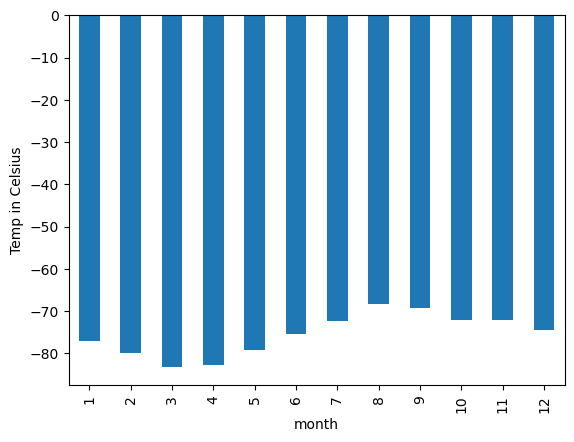


*Ave Min Temp in Celsius, Months sorted by Lowest Temp Avg to Highest* </br>
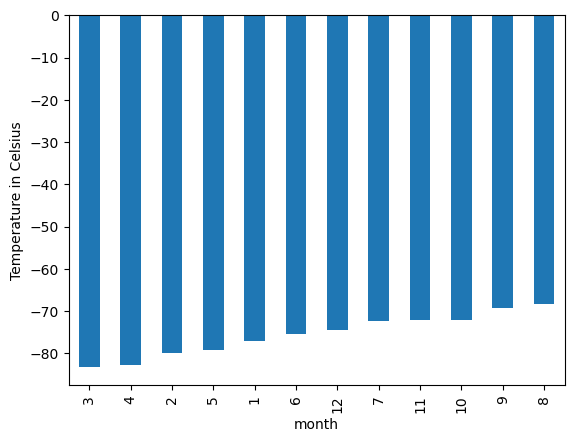


4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
mars_df['month'].value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [14]:
# 2. How many sols (Martian days) worth of data are there?
mars_df['sol'].nunique()

1867

In [15]:
# 3. What is the average minimum temperature by month?
mars_avg_low_temp = mars_df.groupby('month').min_temp.agg('mean')
mars_avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

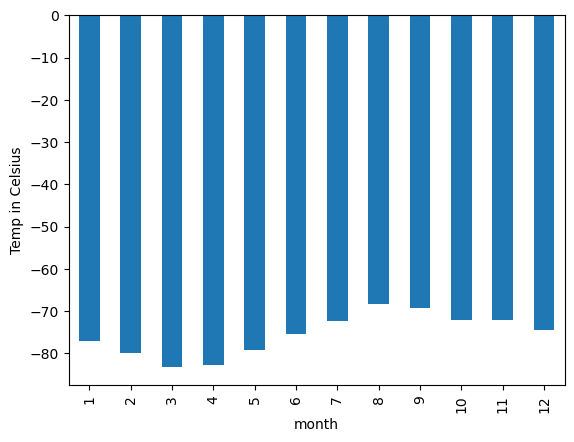

In [16]:
# Plot the average minimum temperature by month
mars_avg_low_temp.plot.bar()
plt.xlabel('month')
plt.ylabel('Temp in Celsius')
plt.show()


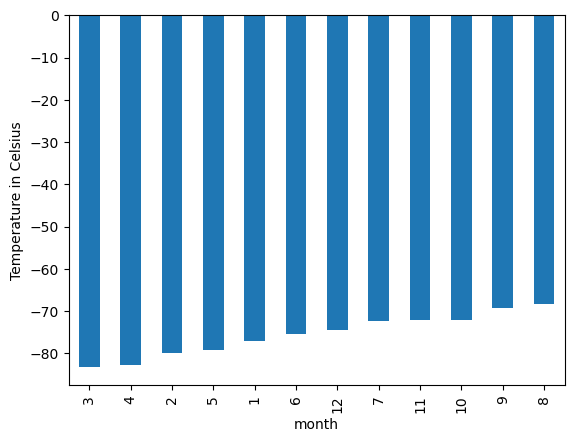

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
mars_min_temp = mars_avg_low_temp.sort_values()

# plot sorted values
mars_min_temp.plot.bar()
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.show()


In [18]:
# 4. What is the average pressure by month?
mars_avg_pressure = mars_df.groupby('month').pressure.agg('mean')
mars_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

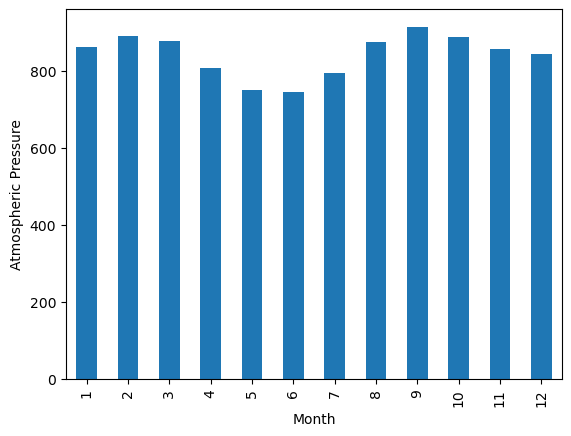

In [19]:
# Plot the average pressure by month
mars_avg_pressure.plot.bar()
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

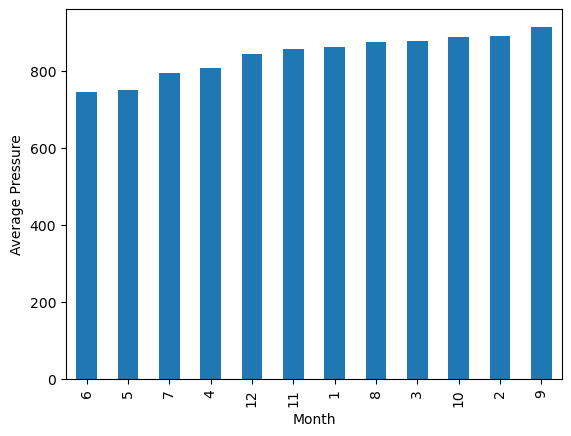

In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
mars_mos_pressure = mars_avg_pressure.sort_values()

# plot sorted values
mars_mos_pressure.plot.bar()
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.show()

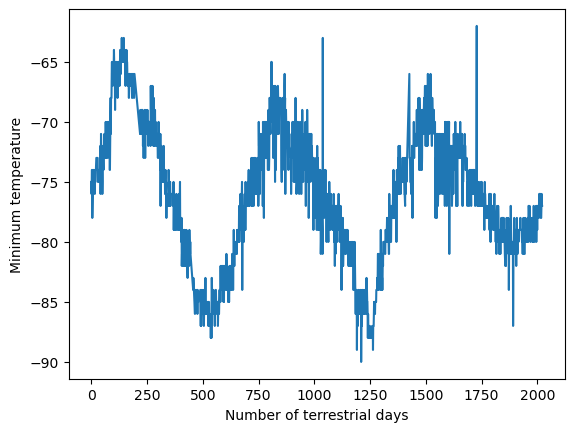

In [23]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
first_terra_day = mars_df['terrestrial_date'].agg('min')

# create a new df with min temps from each record and the calculated # of earth days
terra_days_min_temps_df = pd.DataFrame({
    "min_temp": mars_df['min_temp'],
    "terra_days": mars_df['terrestrial_date'] - first_terra_day
})

# plot the int value of earth days versus the min_temps for each sol record
plt.plot(terra_days_min_temps_df["terra_days"].dt.days, terra_days_min_temps_df["min_temp"])
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")
plt.show()

#### Minimum Temperature

Temperature on Mars is, on a whole, much colder than the temperature on Earth. The month with the average coldest temperature is the 3rd month at -83.30 degrees celsius, with the 8th month having the least cold average temperature of -68.38 celsius.

#### Atmospheric Pressure

The average atmospheric pressure on Mars is lowest on the 6th month of the Martian year, at 745.05 Pa (Pascals), with the highest average atmospheric temperature in the 9th month, at 913.30 Pa.

#### Year Length

In the instructions we were told to consider 2 details - the number of Terran days it takes for Mars to orbit the sun, and the estimate of days between minimum temperatures. The graph generated by the temerature changes can be considered by looking at the space betwen peaks ("highest" minumum temperature) or between troughs (the "lowest" minimum temperature).

Between Peaks
The first peak occurs at around 200 Terran days, with the next peaks occurring at about 800 and 150 days. The different between the first 2 peaks and the second 2 peaks are 600 days and 700 days, averaging at 650 days in the Martian year.

800  - 200 = 600
1500 - 800 = 700
600 + 700 = 1300/2 = 650

Between Troughs
The troughs appear to occur on days 550, 1175 and 1900. The space between troughs total 625 and 725, averaging 675.

1175 - 550 = 625
1900 - 1175 = 725
725 + 625 = 1350/2 = 675

The average between the average peaks and average troughs are 662.5 Terran days, which is not too far off from the number provided by Nasa at 687 Earth days (https://spaceplace.nasa.gov/years-on-other-planets/en/)

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv', header=True, index=False, date_format='%Y-%m-%d')

In [25]:
browser.quit()